In [52]:
clear;
clc;
close all;

In [53]:
load('ex7data1.mat');
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        X          50x2                        800  double

Total is 100 elements using 800 bytes



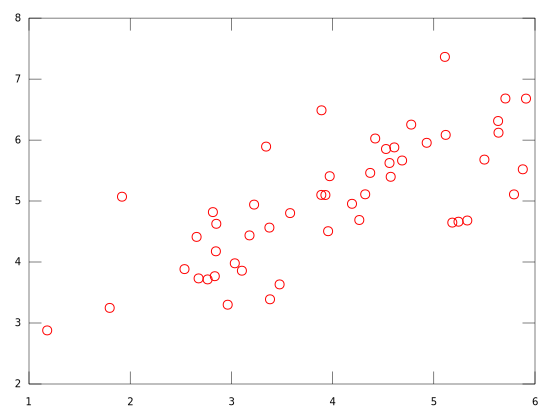

In [54]:
plot(X(:, 1), X(:,2), 'ro', 'markersize', 3)

In [55]:
function [C, centroids] = KMeans(X, K)
    [m, n] = size(X);
    C = zeros(m, 1);
    randIdx = randperm(m, K);
    
    centroids = X(randIdx, :);
    
    preJ = 0;
    
    while true,
        for i = 1:m
            [v, c] = min(sum((centroids - X(i, :)) .^ 2, 2));
            C(i) = c;  
        end

        for k = 1:K
            kIdx = find(C == k);
            centroids(k, :) = mean(X(kIdx, :));
        end
        newJ = computeCostFunction(X, C, centroids, K)
        if (newJ < preJ || preJ == 0)
            preJ = newJ;
        else
            break
        end
    end
end

In [56]:
function J = computeCostFunction(X, C, centroids, K)
    m = length(C);
    J = 0;
    for k = 1:K
        kIdx = find(C == k);
        J += sum(sum((X(kIdx, :) - centroids(k)) .^ 2, 2));
    end
    J = J / m;
end

In [65]:
function plotData(X, C, K)
    hold on;
    markers = {'ro', 'bo', 'ko', 'mo', 'co'}; 
    for k = 1:K
        cIdx = find(C == k);
        plot(X(cIdx, 1), X(cIdx, 2), markers{k}, 'markersize', 3);
    end
    hold off;
end

newJ =  2.4456
newJ =  2.0561
newJ =  1.9745
newJ =  1.9684
newJ =  1.9217
newJ =  1.9034
newJ =  1.9034


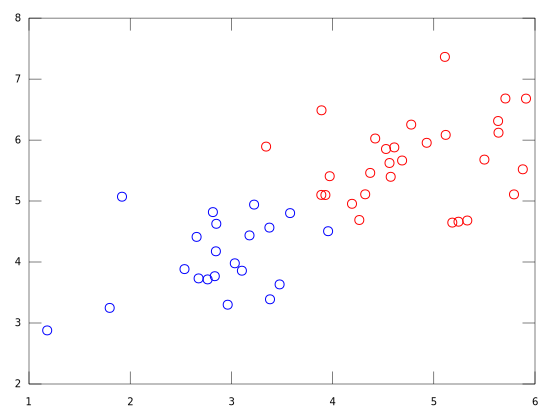

In [66]:
K = 2;
[C, centroids] = KMeans(X, K);
J = computeCostFunction(X, C, centroids, K);
plotData(X, C, K);

newJ =  1.9316
newJ =  1.7550
newJ =  1.7025
newJ =  1.7025


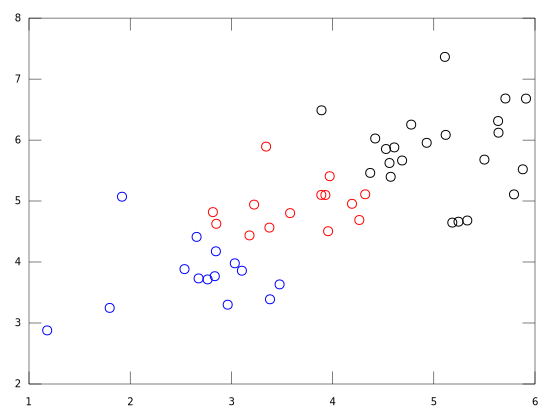

In [69]:
K = 3;
[C, centroids] = KMeans(X, K);
J = computeCostFunction(X, C, centroids, K);
plotData(X, C, K);

newJ =  1.8249
newJ =  1.7674
newJ =  1.7454
newJ =  1.7286
newJ =  1.6653
newJ =  1.6516
newJ =  1.6438
newJ =  1.6398
newJ =  1.6398


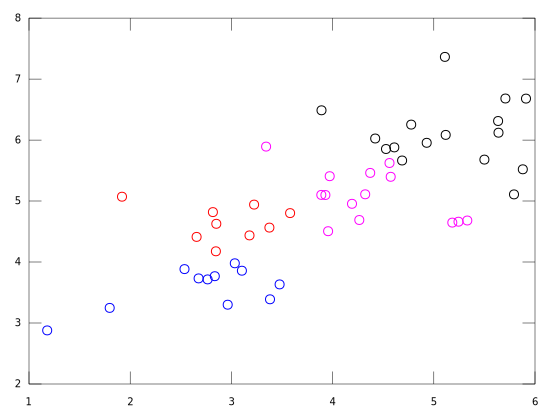

In [70]:
K = 4;
[C, centroids] = KMeans(X, K);
J = computeCostFunction(X, C, centroids, K);
plotData(X, C, K);